<a href="https://colab.research.google.com/github/Aashu-Raj/Extension/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Load data
df_train=pd.read_csv('/content/train_dataset_final1.csv')

In [ ]:
#Make a copy of original dataset
df=pd.DataFrame(df_train)

#Data Preprocessing

In [ ]:
df_train.shape

(25247, 27)

In [ ]:
df_train.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [ ]:
df_train.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
df_train['age'] = df_train['age'].fillna(df_train['age'].median())

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25247 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


In [ ]:
#We have not any information about marriage=0. So we deleted it
df_train=df_train[df_train['marriage']!=0]

In [ ]:
df_train['sex'].value_counts()

,count
sex,
1,15214
0,9980


In [ ]:
df_train['education'].value_counts()

,count
education,
2,11711
1,8985
3,4071
5,253
4,116
6,44
0,14


In [ ]:
#Merge education=5/6 into education=4
df_train.loc[df_train['education'].isin([5, 6]), 'education'] = 4

In [ ]:
#Delete education=0
df_train=df_train[df_train['education']!=0]

In [ ]:
df_train['education'].value_counts()

,count
education,
2,11711
1,8985
3,4071
4,413


In [ ]:
df_train['next_month_default'].value_counts()

,count
next_month_default,
0,20377
1,4803


In [ ]:
customer_id=df_train['Customer_ID']

In [ ]:
#Drop the Customer_ID column
df_train.drop('Customer_ID', axis=1, inplace=True)

#EDA & Financial Insights

<ipython-input-20-2835300744>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='next_month_default', data=df_train, palette='Set2')


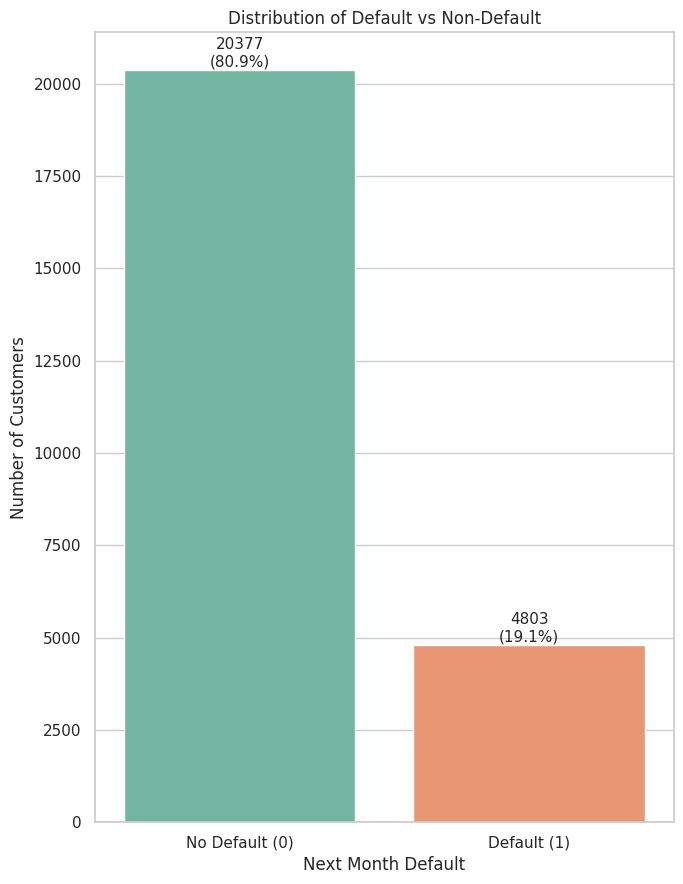

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(7, 9))
ax = sns.countplot(x='next_month_default', data=df_train, palette='Set2')

total = len(df_train)

for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.text(p.get_x() + p.get_width() / 2., count + 100,
            f'{count}\n({percentage:.1f}%)',
            ha='center', fontsize=11)

plt.title("Distribution of Default vs Non-Default")
plt.xlabel("Next Month Default")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])

plt.tight_layout()
plt.show()


<ipython-input-21-3681870023>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sex', data=df_train, palette='Set3')


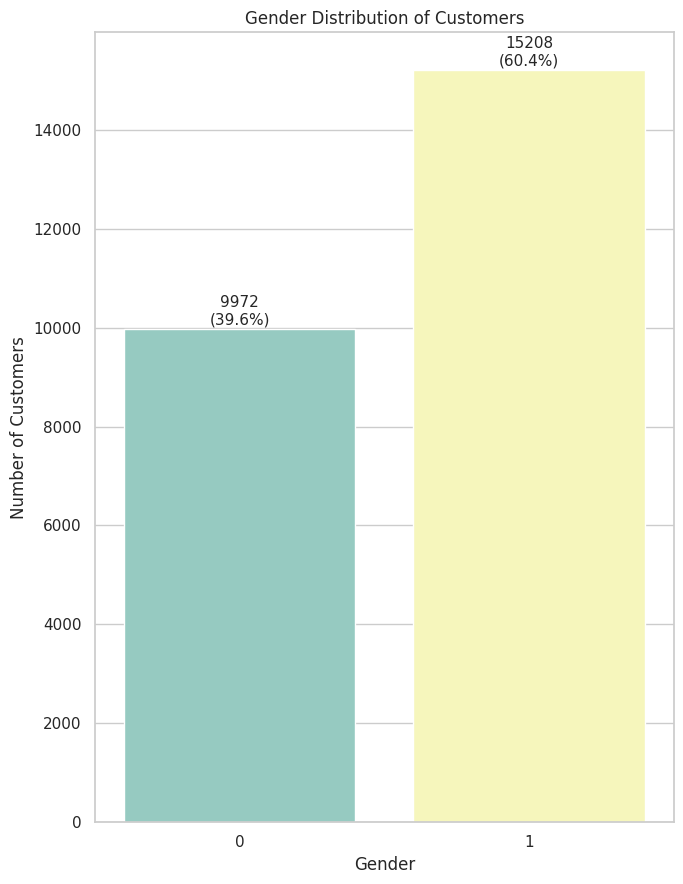

In [ ]:
plt.figure(figsize=(7, 9))
ax = sns.countplot(x='sex', data=df_train, palette='Set3')

total = len(df_train)

for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.text(p.get_x() + p.get_width() / 2., count + 100,
            f'{count}\n({percentage:.1f}%)',
            ha='center', fontsize=11)

plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


In [ ]:
df_train.sample(5)

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
18779,1,0,1,300000,44.0,0,0,0,0,0,...,2303.78,1379.08,1007.84,269.93,206.09,329.19,19768.89,13635.33,0.28,0
14142,2,0,2,100000,40.0,0,0,0,0,0,...,40044.50,3594.61,3217.84,1344.92,3000.15,1275.11,439.98,68856.50,0.03,0
2379,2,1,1,90000,42.0,2,0,0,0,0,...,68227.46,3499.98,3500.28,2999.77,3000.04,3000.12,2799.84,77660.17,0.04,1
8639,2,1,2,70000,24.0,0,0,2,0,0,...,53666.05,3999.96,0.05,1999.79,2000.16,3000.18,1999.95,53485.33,0.04,1
895,2,1,1,500000,31.0,0,0,0,0,0,...,201107.61,25239.17,18011.29,13013.91,45048.68,20102.08,89441.76,217146.33,0.16,0


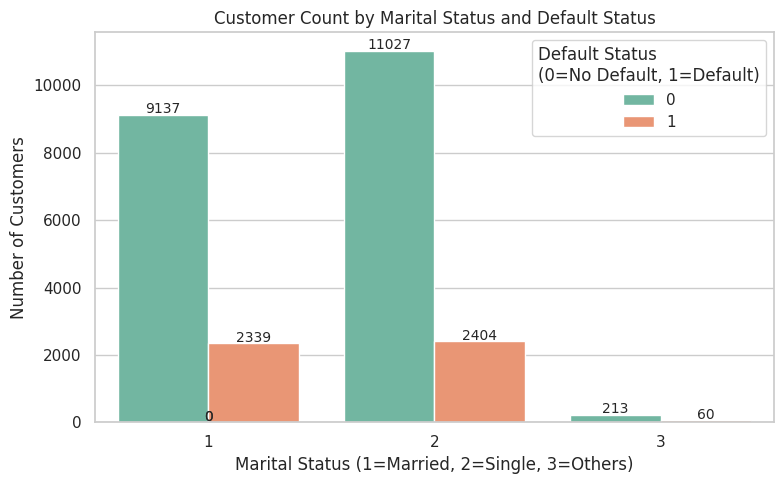

In [ ]:
#Martial status vs Default status
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='marriage', hue='next_month_default', data=df_train, palette='Set2')

for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height + 50,
            f'{height}', ha='center', fontsize=10)

plt.title("Customer Count by Marital Status and Default Status")
plt.xlabel("Marital Status (1=Married, 2=Single, 3=Others)")
plt.ylabel("Number of Customers")
plt.legend(title='Default Status\n(0=No Default, 1=Default)', loc='upper right')

plt.tight_layout()
plt.show()

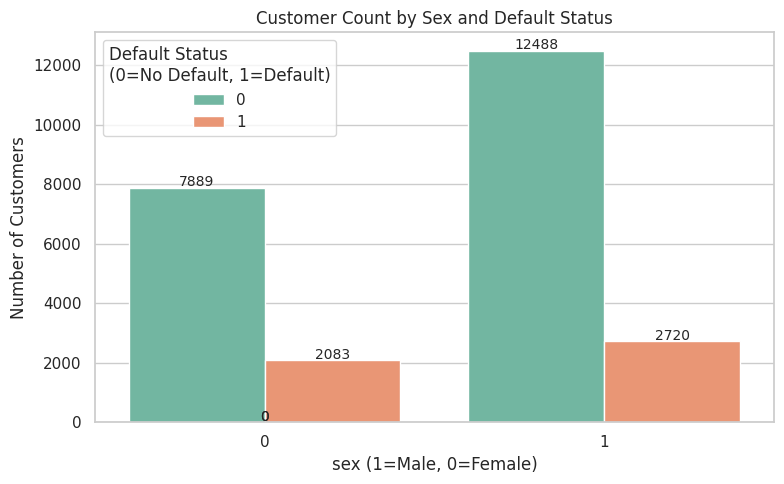

In [ ]:
#sex vs default status
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='sex', hue='next_month_default', data=df_train, palette='Set2')

for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height + 50,
            f'{height}', ha='center', fontsize=10)

plt.title("Customer Count by Sex and Default Status")
plt.xlabel("sex (1=Male, 0=Female)")
plt.ylabel("Number of Customers")
plt.legend(title='Default Status\n(0=No Default, 1=Default)', loc='upper left')

plt.tight_layout()
plt.show()

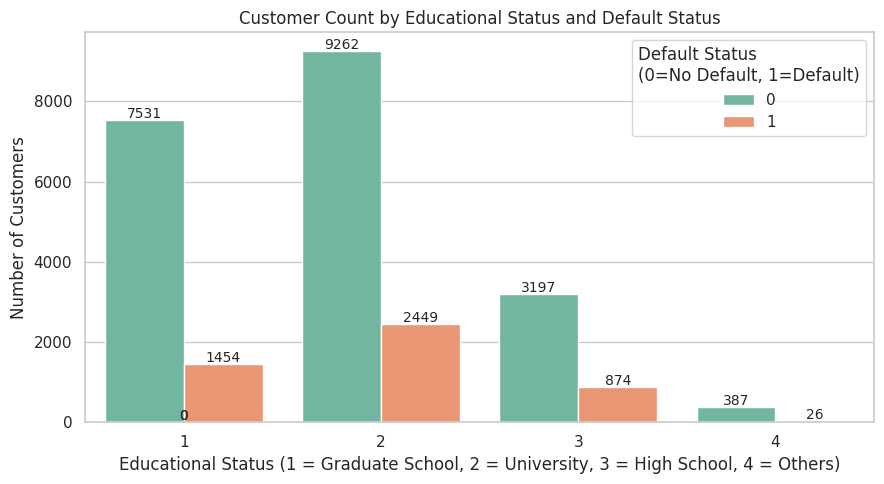

In [ ]:
#Educational status vs Default status
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='education', hue='next_month_default', data=df_train, palette='Set2')

# Add counts above bars
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height + 50,
            f'{height}', ha='center', fontsize=10)

plt.title("Customer Count by Educational Status and Default Status")
plt.xlabel("Educational Status (1 = Graduate School, 2 = University, 3 = High School, 4 = Others)")
plt.ylabel("Number of Customers")
plt.legend(title='Default Status\n(0=No Default, 1=Default)', loc='upper right')

plt.tight_layout()
plt.show()

<ipython-input-26-2288084123>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_counts = df_train[df_train['next_month_default'] == 1].groupby('limit_bal_bin').size().reset_index(name='default_count')
<ipython-input-26-2288084123>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='limit_bal_bin', y='default_count', data=default_counts, palette='rocket')


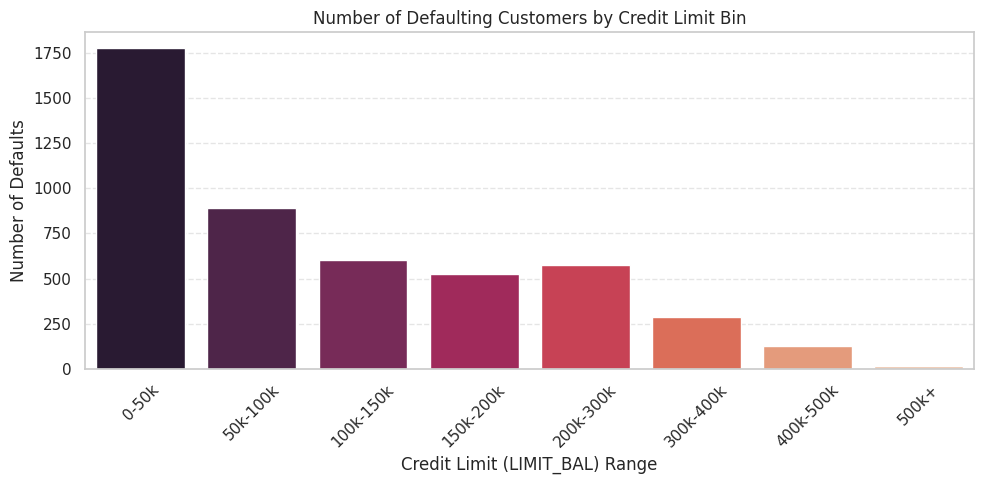

In [ ]:
#Credit limit vs Default status

#1. Create bins for LIMIT_BAL
bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1000000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k', '300k-400k', '400k-500k', '500k+']
df_train['limit_bal_bin'] = pd.cut(df_train['LIMIT_BAL'], bins=bins, labels=labels, include_lowest=True)

#2. Group and count defaults
default_counts = df_train[df_train['next_month_default'] == 1].groupby('limit_bal_bin').size().reset_index(name='default_count')

#3. Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='limit_bal_bin', y='default_count', data=default_counts, palette='rocket')

plt.title("Number of Defaulting Customers by Credit Limit Bin")
plt.xlabel("Credit Limit (LIMIT_BAL) Range")
plt.ylabel("Number of Defaults")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'No of Customers')

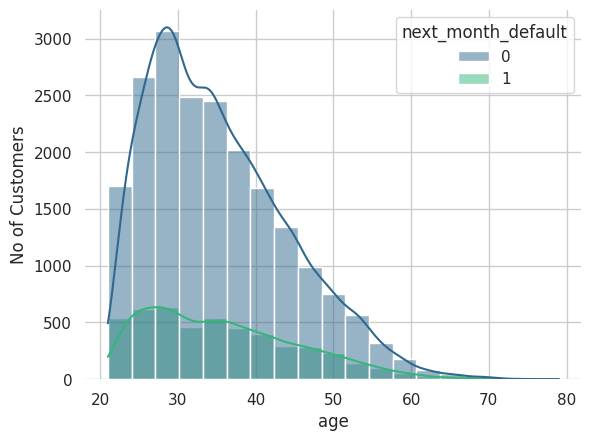

In [ ]:
#Age vs Default
ax=sns.histplot(df_train,x='age',hue='next_month_default',palette='viridis',kde=True,binwidth=3)
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
ax.set_ylabel("No of Customers")


Text(0.5, 0, 'Limit of credit')

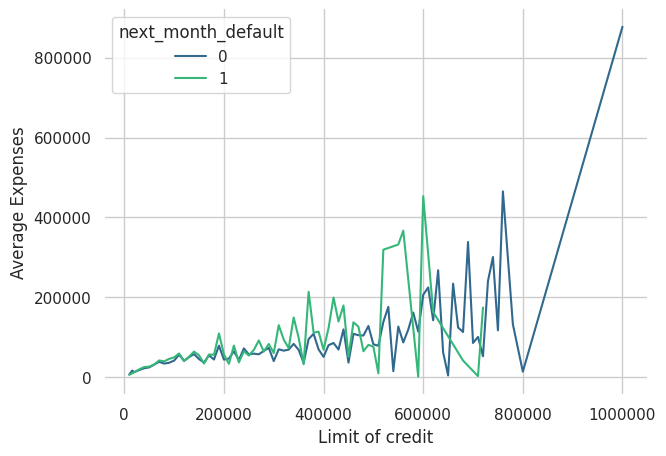

In [ ]:
sns.set(style='whitegrid')
ax=sns.lineplot(df_train,x="LIMIT_BAL",y="AVG_Bill_amt",errorbar=None,hue="next_month_default",palette='viridis')
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(11,4)})
sns.set_style('white')
plt.ticklabel_format(style='plain',axis='x')
ax.set_ylabel('Average Expenses')
ax.set_xlabel('Limit of credit')

<ipython-input-29-4000404628>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_group = df_train.groupby('util_bin')['next_month_default'].agg(['count', 'sum'])
<ipython-input-29-4000404628>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=util_group.index, y=util_group['default_rate'], palette='viridis')


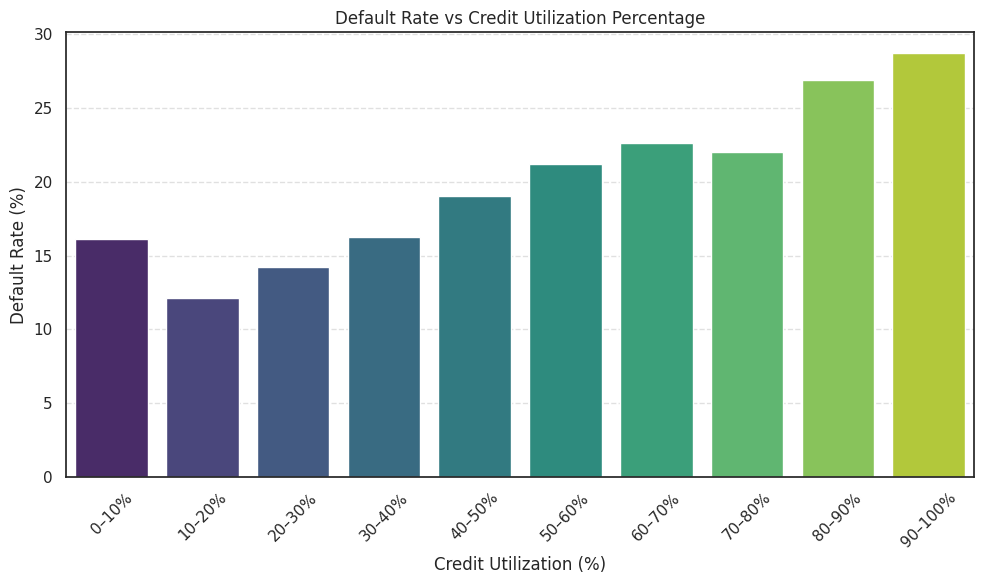

          count  default_rate
util_bin                     
0–10%      9112     16.110623
10–20%     2062     12.124151
20–30%     1509     14.247846
30–40%     1565     16.230032
40–50%     1562     19.014085
50–60%     1521     21.236029
60–70%     1681     22.665080
70–80%     1796     21.993318
80–90%     1874     26.894344
90–100%    1808     28.705752


In [ ]:
#Percentage usage of available limit do customers tend to default

#1. Create credit utilization feature (in %)
df_train['utilization_pct'] = (df_train['AVG_Bill_amt'] / df_train['LIMIT_BAL']) * 100

#2. Create utilization bins (10% intervals)
df_train['util_bin'] = pd.cut(df_train['utilization_pct'],
                        bins=np.arange(0, 110, 10),
                        labels=[f'{i}–{i+10}%' for i in range(0, 100, 10)],
                        include_lowest=True)

#3. Group by bin and calculate default rate
util_group = df_train.groupby('util_bin')['next_month_default'].agg(['count', 'sum'])
util_group['default_rate'] = (util_group['sum'] / util_group['count']) * 100

#4. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=util_group.index, y=util_group['default_rate'], palette='viridis')

plt.title('Default Rate vs Credit Utilization Percentage')
plt.xlabel('Credit Utilization (%)')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Print the table for insight
print(util_group[['count', 'default_rate']])


In [ ]:
over_limit = df_train[df_train['utilization_pct'] > 100]

print(f"Number of customers using more than 100% of their credit limit: {over_limit.shape[0]}")

over_limit.head()


Number of customers using more than 100% of their credit limit: 520


,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,limit_bal_bin,utilization_pct,util_bin
14,1,1,3,30000,59.0,0,0,0,0,0,...,1219.76,1231.98,1052.16,1500.05,30688.50,0.06,0,0-50k,102.295000,NaN
22,2,0,2,120000,68.0,2,2,0,0,0,...,4369.76,4440.10,12600.02,4500.12,124263.17,0.05,1,100k-150k,103.552642,NaN
56,1,1,2,120000,40.0,0,0,0,0,0,...,6499.69,4999.86,4999.95,5000.09,122553.00,0.05,0,100k-150k,102.127500,NaN
58,2,1,2,60000,24.0,2,2,2,0,0,...,2250.12,4999.88,4800.17,0.00,63690.00,0.05,1,50k-100k,106.150000,NaN
224,2,0,1,150000,26.0,2,2,2,2,2,...,10047.85,0.21,5118.09,4516.80,162921.17,0.03,1,100k-150k,108.614113,NaN


In [ ]:
#Analyze whether the pay_amt_x is at least equal to the minimum amount due. We don't have a column named minimum_due in the dataset. So we assume that minimum due = 5% to 10% of previous month's bill

# Step 1: Approximate minimum due as 5% of previous month's bill
for i in range(1, 7):
    df_train[f'min_due{i}'] = df_train[f'Bill_amt{i}'] * 0.05
    df_train[f'paid_enough{i}'] = df_train[f'pay_amt{i}'] >= df_train[f'min_due{i}']

# Step 2: Create overall indicator — did they pay enough in most months?
paid_cols = [f'paid_enough{i}' for i in range(1, 7)]
df_train['paid_minimum_enough_ratio'] = df_train[paid_cols].sum(axis=1) / 6
df_train['consistent_minimum_payer'] = df_train['paid_minimum_enough_ratio'] >= 0.8  # paid enough in >= 5 out of 6 months

# Step 3: Analyze impact on default
result = df_train.groupby('consistent_minimum_payer')['next_month_default'].agg(['count', 'mean']).rename(columns={'mean': 'default_rate'})
print(result)


                          count  default_rate
consistent_minimum_payer                     
False                     17123      0.221924
True                       8057      0.124488


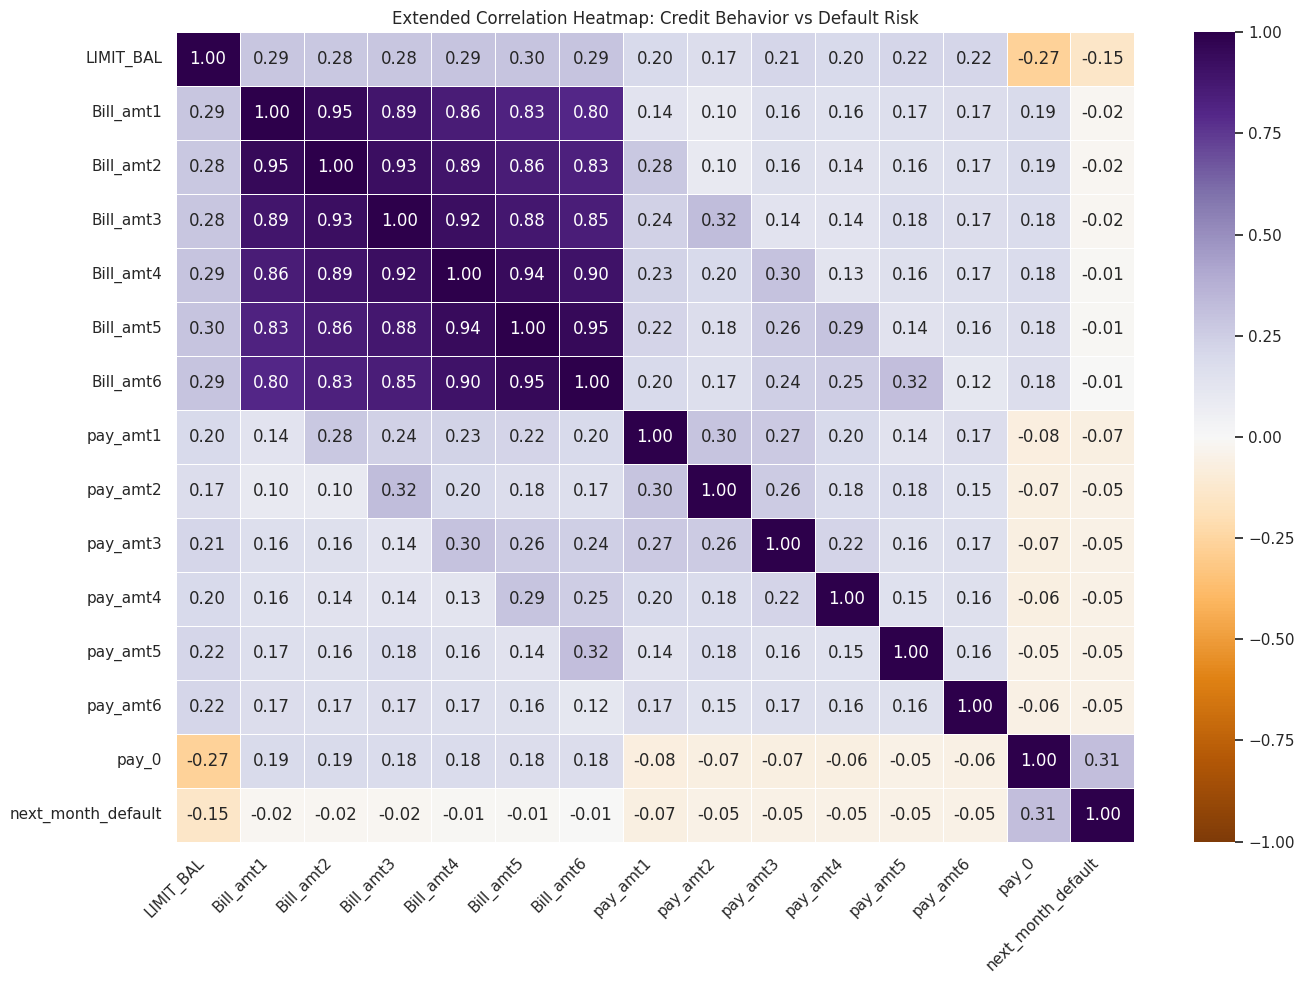

In [ ]:
#Correlation between some features
corr_features = ['LIMIT_BAL'] + \
                [f'Bill_amt{i}' for i in range(1, 7)] + \
                [f'pay_amt{i}' for i in range(1, 7)] + \
                ['pay_0', 'next_month_default']

# Compute correlation matrix
corr_matrix = df_train[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='PuOr', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Extended Correlation Heatmap: Credit Behavior vs Default Risk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df_train.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'limit_bal_bin', 'utilization_pct', 'util_bin', 'min_due1',
       'paid_enough1', 'min_due2', 'paid_enough2', 'min_due3', 'paid_enough3',
       'min_due4', 'paid_enough4', 'min_due5', 'paid_enough5', 'min_due6',
       'paid_enough6', 'paid_minimum_enough_ratio',
       'consistent_minimum_payer'],
      dtype='object')

#Feature Engineering

In [ ]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
df=df[df['marriage']!=0]

In [ ]:
df.loc[df['education'].isin([5, 6]), 'education'] = 4

In [ ]:
df=df[df['education']!=0]

In [ ]:
df['next_month_default'].value_counts()

,count
next_month_default,
0,20377
1,4803


In [ ]:
df['age'] = df['age'].fillna(df['age'].median())

In [ ]:
df = df.drop('Customer_ID', axis=1)

In [ ]:
x=df.iloc[:,:-1]
y=df['next_month_default']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=2)
x_resampled, y_resampled=smt.fit_resample(x,y)

In [ ]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.3)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif

In [ ]:
x_train_smt.shape

(28527, 25)

In [ ]:
select_feature=SelectKBest(f_classif,k=16)
select_feature.fit(x_train_smt,y_train_smt)

x_train_smt_Kbest16=select_feature.transform(x_train_smt)
x_test_smt_Kbest16=select_feature.transform(x_test_smt)

In [ ]:
x_train_smt_Kbest16.shape

(28527, 16)

In [ ]:
corr_var=df.corr()
corr_var

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
marriage,1.000000,-0.030661,-0.149976,-0.104900,-0.416098,0.020062,0.023604,0.031596,0.031133,0.031494,...,-0.020340,-0.004310,-0.006056,-0.002459,-0.015069,-0.000278,-0.006967,-0.025766,-0.001942,-0.027706
sex,-0.030661,1.000000,0.018488,0.023550,-0.090160,-0.051002,-0.066745,-0.060833,-0.061196,-0.052938,...,-0.013611,-0.001396,-0.001147,-0.006834,-0.002117,-0.003160,-0.005000,-0.023812,0.009882,-0.037383
education,-0.149976,0.018488,1.000000,-0.232524,0.182174,0.113429,0.135832,0.123046,0.117968,0.106737,...,-0.011381,-0.045127,-0.030936,-0.040917,-0.040039,-0.043196,-0.042161,0.004424,-0.013069,0.034077
LIMIT_BAL,-0.104900,0.023550,-0.232524,1.000000,0.142526,-0.268694,-0.294552,-0.283022,-0.264934,-0.246191,...,0.292764,0.196421,0.174671,0.211812,0.202416,0.217865,0.217585,0.302403,0.028365,-0.146217
age,-0.416098,-0.090160,0.182174,0.142526,1.000000,-0.041148,-0.053773,-0.053460,-0.046424,-0.052544,...,0.047376,0.024109,0.022205,0.028460,0.023427,0.023015,0.020993,0.056190,0.000595,0.018250
pay_0,0.020062,-0.051002,0.113429,-0.268694,-0.041148,1.000000,0.667213,0.569412,0.535201,0.507535,...,0.176008,-0.075099,-0.065847,-0.066839,-0.063693,-0.052794,-0.056083,0.192406,-0.053736,0.313525
pay_2,0.023604,-0.066745,0.135832,-0.294552,-0.053773,0.667213,1.000000,0.766665,0.662869,0.623665,...,0.218557,-0.079880,-0.055024,-0.051552,-0.045634,-0.032579,-0.034794,0.239459,-0.040893,0.252410
pay_3,0.031596,-0.060833,0.123046,-0.283022,-0.053460,0.569412,0.766665,1.000000,0.775797,0.686721,...,0.222829,0.005431,-0.063567,-0.050852,-0.045118,-0.030646,-0.035764,0.239048,-0.039109,0.226115
pay_4,0.031133,-0.061196,0.117968,-0.264934,-0.046424,0.535201,0.662869,0.775797,1.000000,0.819023,...,0.241231,-0.004711,-0.000692,-0.063772,-0.043092,-0.029851,-0.027342,0.249419,-0.034616,0.207732
pay_5,0.031494,-0.052938,0.106737,-0.246191,-0.052544,0.507535,0.623665,0.686721,0.819023,1.000000,...,0.264140,-0.002190,-0.002871,0.013270,-0.058356,-0.030718,-0.023141,0.261923,-0.036328,0.196684


<Axes: >

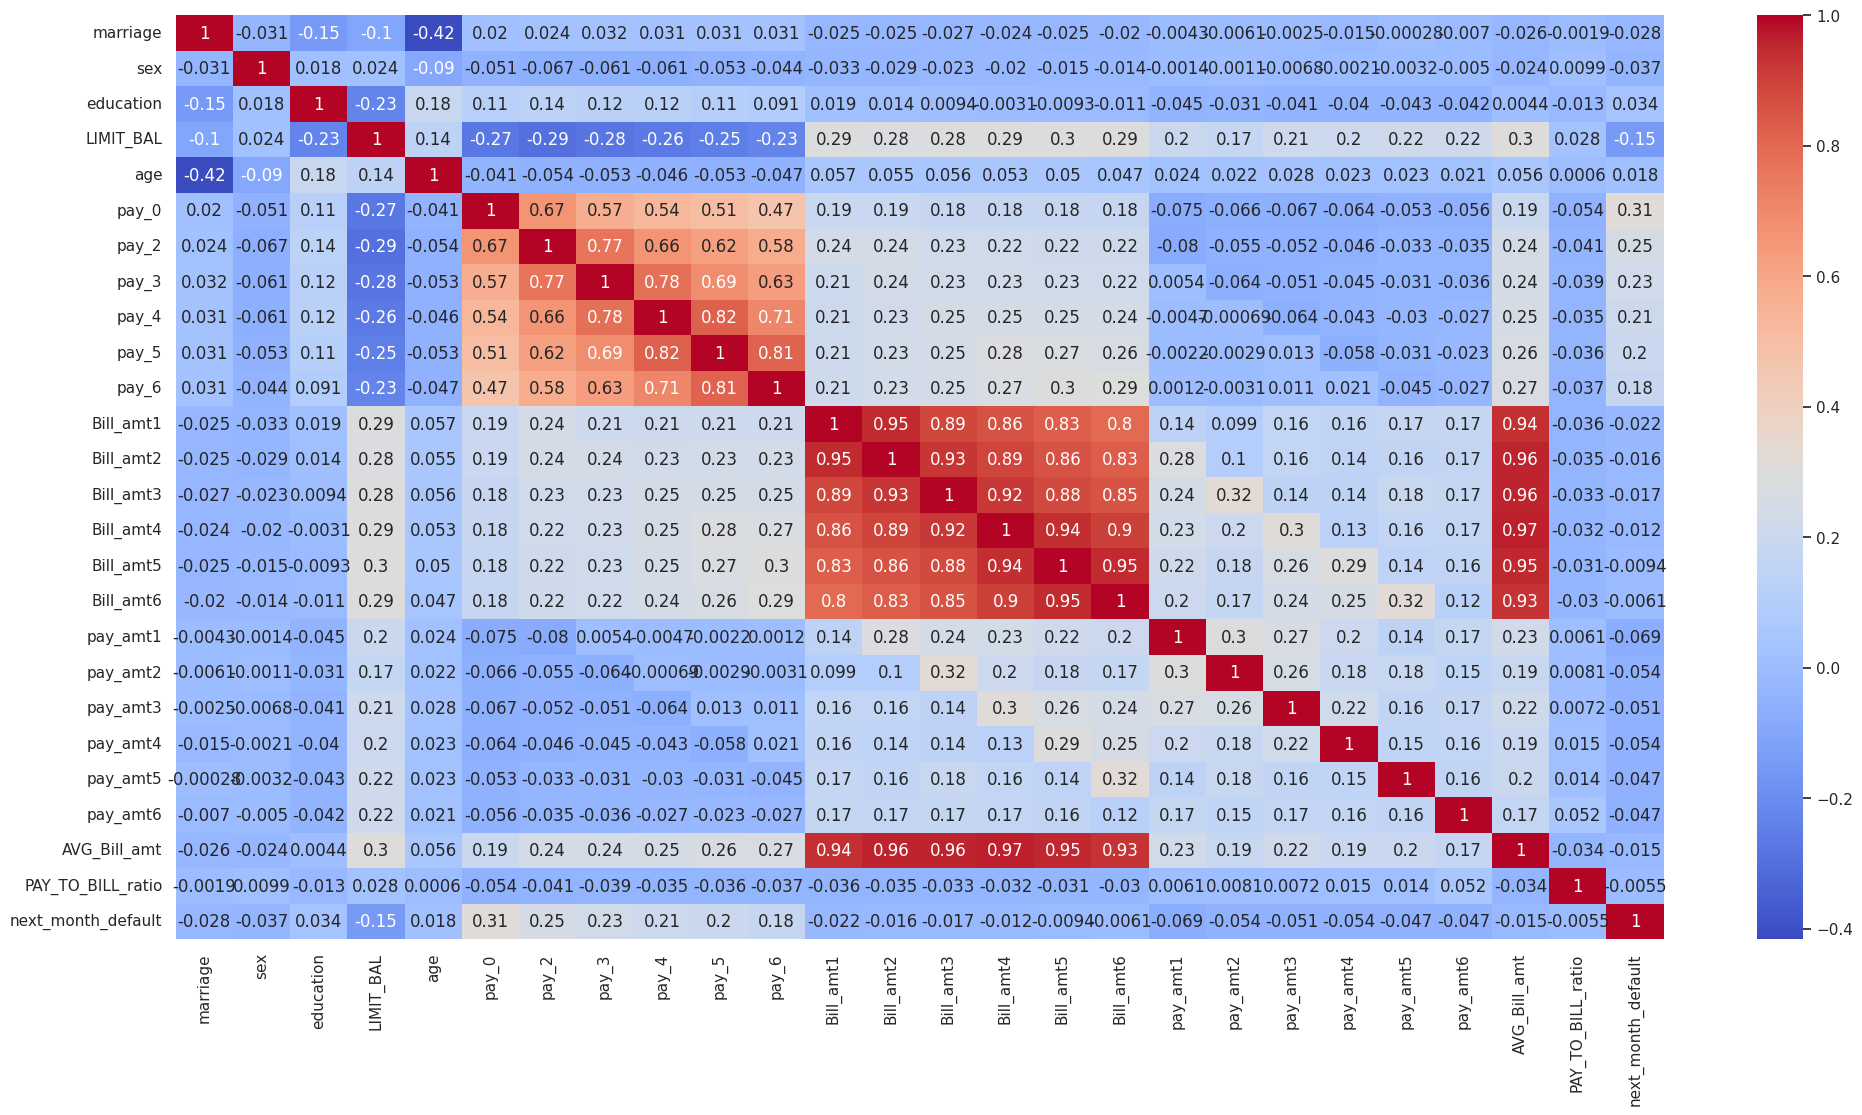

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.heatmap(corr_var,annot=True, cmap='coolwarm')

#ML Models for prediction
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Naive Bayes
5. XGBoost

###Logistic Regression

In [ ]:
#1. LogisticRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
lr=LogisticRegression()
lr.fit(x_train_smt_Kbest16, y_train_smt)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction_lr=lr.predict(x_test_smt_Kbest16)

In [ ]:
accuracy_lr=accuracy_score(y_test_smt, prediction_lr)
print(f"Accuracy score: {accuracy_lr:.4f}")

## CONFUSION MATRIX
print("-------------------------------")
cm_rf = confusion_matrix(y_test_smt, prediction_lr)
print("Confusion matrix:")
print(cm_rf)

print("-------------------------------")
## Classification Report
report_rf = metrics.classification_report(y_test_smt, prediction_lr)
print("Classification report:")
print(report_rf)


Accuracy score: 0.6381
-------------------------------
Confusion matrix:
[[3998 2133]
 [2292 3804]]
-------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6131
           1       0.64      0.62      0.63      6096

    accuracy                           0.64     12227
   macro avg       0.64      0.64      0.64     12227
weighted avg       0.64      0.64      0.64     12227



###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_smt_Kbest16, y_train_smt)

DecisionTreeClassifier()

In [ ]:
prediction_dt=dt.predict(x_test_smt_Kbest16)

In [ ]:
accuracy_dt=accuracy_score(y_test_smt, prediction_dt)
print(f"Accuracy score: {accuracy_dt:.4f}")


## CONFUSION MATRIX
print("-------------------------------")
cm_rf = confusion_matrix(y_test_smt, prediction_dt)
print("Confusion matrix:")
print(cm_rf)

print("-------------------------------")
## Classification Report
report_rf = metrics.classification_report(y_test_smt, prediction_dt)
print("Classification report:")
print(report_rf)


Accuracy score: 0.7524
-------------------------------
Confusion matrix:
[[4582 1549]
 [1479 4617]]
-------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      6131
           1       0.75      0.76      0.75      6096

    accuracy                           0.75     12227
   macro avg       0.75      0.75      0.75     12227
weighted avg       0.75      0.75      0.75     12227



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_smt_Kbest16, y_train_smt)

RandomForestClassifier()

In [ ]:
prediction_rf=rf.predict(x_test_smt_Kbest16)

In [ ]:
accuracy_rf=accuracy_score(y_test_smt, prediction_rf)
print(f"Accuracy score: {accuracy_rf:.4f}")

## CONFUSION MATRIX
print("-------------------------------")
cm_rf = confusion_matrix(y_test_smt, prediction_rf)
print("Confusion matrix:")
print(cm_rf)

print("-------------------------------")
## Classification Report
report_rf = metrics.classification_report(y_test_smt, prediction_rf)
print("Classification report:")
print(report_rf)


Accuracy score: 0.8394
-------------------------------
Confusion matrix:
[[5282  849]
 [1115 4981]]
-------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6131
           1       0.85      0.82      0.84      6096

    accuracy                           0.84     12227
   macro avg       0.84      0.84      0.84     12227
weighted avg       0.84      0.84      0.84     12227



###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train_smt_Kbest16,y_train_smt)

GaussianNB()

In [ ]:
prediction_nb=nb.predict(x_test_smt_Kbest16)

In [ ]:
accuracy_nb=accuracy_score(y_test_smt, prediction_nb)
print(f"Accuracy score: {accuracy_nb:.4f}")

## CONFUSION MATRIX
print("-------------------------------")
cm_nb = confusion_matrix(y_test_smt, prediction_nb)
print("Confusion matrix:")
print(cm_nb)

print("-------------------------------")
## Classification Report
report_nb = metrics.classification_report(y_test_smt, prediction_nb)
print("Classification report:")
print(report_nb)


Accuracy score: 0.5494
-------------------------------
Confusion matrix:
[[ 934 5197]
 [ 312 5784]]
-------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.15      0.25      6131
           1       0.53      0.95      0.68      6096

    accuracy                           0.55     12227
   macro avg       0.64      0.55      0.47     12227
weighted avg       0.64      0.55      0.46     12227



###XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_train=xgb.DMatrix(x_train_smt_Kbest16,y_train_smt,enable_categorical=True)
xgb_test=xgb.DMatrix(x_test_smt_Kbest16,y_test_smt,enable_categorical=True)

In [ ]:
n=50
params={
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}
xg=xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

In [ ]:
prediction_xgb=xg.predict(xgb_test)
prediction_xgb=prediction_xgb.astype(int)

In [ ]:
accuracy_xgb=accuracy_score(y_test_smt, prediction_xgb)
print(f"Accuracy score: {accuracy_xgb:.4f}")

## CONFUSION MATRIX
print("-------------------------------")
cm_xgb = confusion_matrix(y_test_smt, prediction_xgb)
print("Confusion matrix:")
print(cm_xgb)

print("-------------------------------")
## Classification Report
report_xgb = metrics.classification_report(y_test_smt, prediction_xgb)
print("Classification report:")
print(report_xgb)


Accuracy score: 0.5014
-------------------------------
Confusion matrix:
[[6131    0]
 [6096    0]]
-------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      6131
           1       0.00      0.00      0.00      6096

    accuracy                           0.50     12227
   macro avg       0.25      0.50      0.33     12227
weighted avg       0.25      0.50      0.33     12227



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Prediction on validate_dataset_final

In [ ]:
val_df=pd.read_csv('/content/validate_dataset_final.csv')

In [ ]:
val_df.shape

(5016, 26)

In [ ]:
val_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
val_df['marriage'].value_counts()

,count
marriage,
2,2702
1,2262
3,43
0,9


In [ ]:
#We have not any information about marriage=0. So we deleted it
val_df=val_df[val_df['marriage']!=0]

In [ ]:
val_df['sex'].value_counts()

,count
sex,
1,3035
0,1972


In [ ]:
val_df['education'].value_counts()

,count
education,
2,2373
1,1794
3,754
5,54
4,20
6,10
0,2


In [ ]:
#Merge education=5/6 into education=4
val_df.loc[val_df['education'].isin([5, 6]), 'education'] = 4
#Delete education=0
val_df=val_df[val_df['education']!=0]

In [ ]:
val_df['education'].value_counts()

,count
education,
2,2373
1,1794
3,754
4,84


In [ ]:
val_df_customer_id=val_df['Customer_ID']

In [ ]:
val_df=val_df.drop('Customer_ID', axis=1)

In [ ]:
x_val_test_smt=pd.DataFrame(val_df)

In [ ]:
x_val_test_smt.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,2,220000,32,0,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,0,1,350000,35,-1,-1,-1,0,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,2,1,1,310000,39,0,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,1,0,2,20000,47,0,0,0,2,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,2,1,2,500000,30,0,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [ ]:
x_val_transformed = select_feature.transform(val_df)
X_val_test_transformed=select_feature.transform(x_val_test_smt)

In [ ]:
submission_prediction=rf.predict(x_val_transformed)

In [ ]:
submission=pd.DataFrame({'Customer_ID': val_df_customer_id, 'next_month_default': submission_prediction})

In [ ]:
submission.to_csv('final_submission.csv', index=False)